In [1]:
import os
import pandas as pd

In [2]:
WORKING_DIR = '.'
DATA_DIR = os.path.join(WORKING_DIR, '..', '..', 'data')

LABELS_FILE = 'labels.csv'

# Flowers dataset for network sanity checks
FLOWERS = os.path.join(DATA_DIR, '17flowers')

# Real datasets
FASHION_144k = os.path.join(DATA_DIR, '144k')
FASHION_144k_IMAGES = os.path.join(DATA_DIR, '144k', 'images')

In [3]:
df_florwers = pd.read_csv(os.path.join(FLOWERS, LABELS_FILE))

In [4]:
df_florwers.head()

,id,label,image_name
0,1,0,image_0001.jpg
1,2,0,image_0002.jpg
2,3,0,image_0003.jpg
3,4,0,image_0004.jpg
4,5,0,image_0005.jpg


In [5]:
df_144k = pd.read_csv(os.path.join(FASHION_144k, '144k.csv'))

In [6]:
df_144k.head()

,dt,relvotes,dat3,dat4,dat5,dat6,dat7,dat8,dat9,dat10,...,dat259,dat260,dat261,dat262,dat263,dat264,dat265,dat266,dat267,dat268
0,1.971681,10,-1.163832,-0.377005,0.974638,0.825289,0.350482,-1.557694,0.178111,-0.489689,...,-0.806893,-0.391937,0.152572,-1.069564,0.380985,-0.224829,0.800282,0.065237,-0.134836,0
1,1.959294,2,-1.163832,-0.377005,0.974638,0.825289,0.350482,-1.557694,0.178111,-0.489689,...,-0.806893,-0.391937,0.152572,-1.069564,0.380985,-0.224829,0.800282,0.065237,-0.134836,0
2,1.954731,1,-1.163832,-0.377005,0.974638,0.825289,0.350482,-1.557694,0.178111,-0.489689,...,-0.806893,-0.391937,0.152572,-1.069564,0.380985,-0.224829,0.800282,0.065237,-0.134836,0
3,1.959513,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,1.959513,7,-1.163832,-0.377005,0.974638,0.825289,0.350482,-1.557694,0.178111,-0.489689,...,-0.806893,-0.391937,0.152572,-1.069564,0.380985,-0.224829,0.800282,0.065237,-0.134836,0


In [10]:
df_144k_new = pd.DataFrame()

In [11]:
df_144k_new['label'] = df_144k['relvotes']

In [15]:
df_144k_new['id'] = [i for i in range(len(df_144k))]

In [19]:
with open(os.path.join(FASHION_144k, 'photos.txt'), encoding='utf-8') as names_file:
    names = names_file.read().splitlines()

print(len(names), len(df_144k))

144169 144169


In [20]:
df_144k_new['image_name'] = names

In [21]:
df_144k_new.head()

,label,id,image_name
0,10,0,6475795322-6475795322_400.jpg
1,2,1,10515538260-10515538260_400.jpg
2,1,2,8666979006-8666979006_400.jpg
3,3,3,2354760120-2354760120_400.jpg
4,7,4,5482806293-5482806293_400.jpg


In [28]:
df_144k_new.to_csv(os.path.join(FASHION_144k, LABELS_FILE), sep=',', encoding='utf-8', index=False)

In [6]:
df_144k_check = pd.read_csv(os.path.join(FASHION_144k, LABELS_FILE))

In [74]:
df_144k_check.head(n=12)

,label,id,image_name
0,10,0,6475795322-6475795322_400.jpg
1,2,1,10515538260-10515538260_400.jpg
2,1,2,8666979006-8666979006_400.jpg
3,3,3,2354760120-2354760120_400.jpg
4,7,4,5482806293-5482806293_400.jpg
5,7,5,9917081677-9917081677_400.jpg
6,1,6,5915788190-5915788190_400.jpg
7,8,7,4500194296-4500194296_400.jpg
8,8,8,6803143270-6803143270_400.jpg
9,5,9,7655367442-7655367442_400.jpg


In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_WIDTH = 600
IMG_HEIGHT = 1000

def resize_image_to_width(img, width, height):
    return cv2.resize(img, (width, height), interpolation=cv2.INTER_CUBIC)

def make_collage_with_text(images, labels, img_width=IMG_WIDTH, img_height=IMG_HEIGHT, columns=4):
    resized_images = [resize_image_to_width(img, img_width, img_height) for img in images]
    res_image = np.empty((0, img_width * columns, 3))
    row = np.empty((img_height, 0, 3))
    for i, img in enumerate(resized_images):
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(labels[i]), (30,150), font, 4, (0,255,0), 10, cv2.LINE_AA)
        row = np.hstack([row, img])
        if row.shape[1] == img_width * columns:
            res_image = np.vstack([res_image, row])
            row = np.empty((img_height, 0, 3))
    res_image = res_image.astype('uint8')
    plt.figure(figsize=(15,15))
    plt.axis("off")
    plt.imshow(cv2.cvtColor(res_image, cv2.COLOR_BGR2RGB))

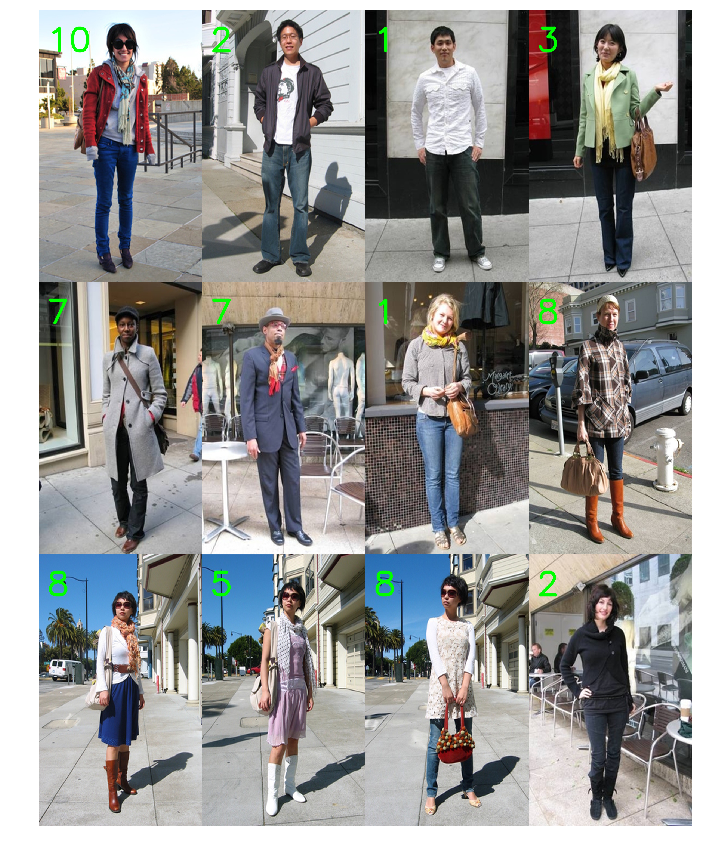

In [76]:
labels = []
images = []
for _, row in df_144k_check.head(n=12).iterrows():
    full_name = os.path.join(FASHION_144k_IMAGES, row.image_name)
    labels.append(row.label)
    images.append(cv2.imread(full_name))
make_collage_with_text(images, labels)